## Pregunta: V2 - Cambio porcentual de mantenedores de un paquete en cada distro de Ubuntu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the data
df = pd.read_csv("../../datawarehouse/processed-ubuntu-packages.csv")

df.head()

,Distro-Version,Distro-Year,Package,Description,Section,Version,Architecture,Priority,Essential,Build-Essential,...,Original-Maintainer,Size,Installed-Size,Depends,Pre-Depends,Recommends,Conflicts,Suggests,Replaces,Provides
0,18.04 - bionic,2018,acct,Description,admin,6.6.4-1,amd64,optional,no,no,...,Debian,87216.0,297.0,"libc6 (>= 2.14), lsb-base",NaN,NaN,NaN,NaN,NaN,NaN
1,18.04 - bionic,2018,acl,Description,utils,2.2.52-3build1,amd64,optional,no,no,...,Anibal,38504.0,200.0,"libacl1 (= 2.2.52-3build1), libc6 (>= 2.14)",NaN,NaN,NaN,NaN,NaN,NaN
2,18.04 - bionic,2018,acpi-support,Description,admin,0.142,amd64,optional,no,no,...,Bart,10196.0,92.0,acpid (>= 1.0.4-1ubuntu4),NaN,"toshset, wireless-tools",uswsusp (<= 0.2),NaN,NaN,NaN
3,18.04 - bionic,2018,acpid,Description,admin,1:2.0.28-1ubuntu1,amd64,optional,no,no,...,Debian,36518.0,139.0,"libc6 (>= 2.15), init-system-helpers (>= 1.18~...",NaN,"toshset, wireless-tools",uswsusp (<= 0.2),NaN,NaN,NaN
4,18.04 - bionic,2018,adduser,Description,admin,3.116ubuntu1,all,important,no,yes,...,Debian,162684.0,624.0,"passwd, debconf (>= 0.5) | debconf-2.0",NaN,"toshset, wireless-tools",uswsusp (<= 0.2),"liblocale-gettext-perl, perl, ecryptfs-utils (...",NaN,NaN


First we will count and plot the number of different Maintainers for each Package in each Distro-Version

Number of different Maintainers for bionic:  134
Number of different Maintainers for focal:  120
Number of different Maintainers for jammy:  120
Number of different Maintainers for kinetic:  120
Number of different Original-Maintainers for bionic:  1200
Number of different Original-Maintainers for focal:  1154
Number of different Original-Maintainers for jammy:  1155
Number of different Original-Maintainers for kinetic:  1158


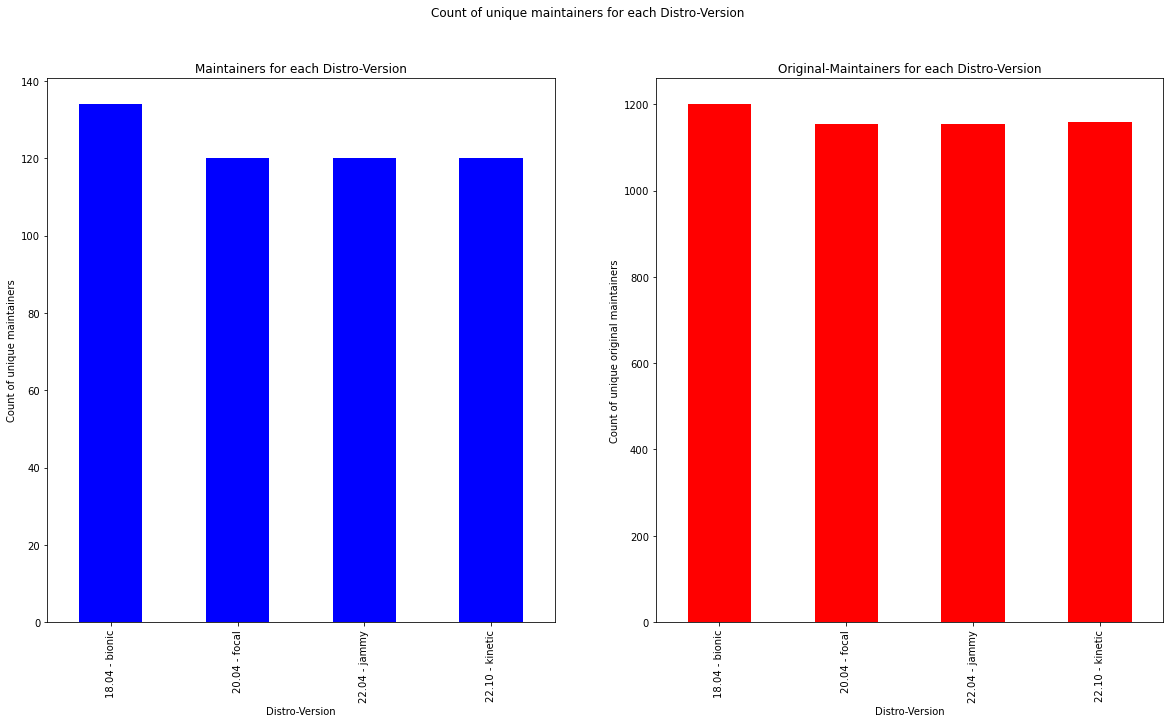

In [2]:
# Get only Distro-Version, Package and Maintainer
df = df[['Distro-Version', 'Package', 'Maintainer', 'Original-Maintainer']]

# Divide dataframes by Distro-Version
df_bionic = df[df['Distro-Version'] == '18.04 - bionic']
df_focal = df[df['Distro-Version'] == '20.04 - focal']
df_jammy = df[df['Distro-Version'] == '22.04 - jammy']
df_kinetic = df[df['Distro-Version'] == '22.10 - kinetic']

# Calculate the number of different values of Maintainers for each df
print('Number of different Maintainers for bionic: ', df_bionic['Maintainer'].nunique())
print('Number of different Maintainers for focal: ', df_focal['Maintainer'].nunique())
print('Number of different Maintainers for jammy: ', df_jammy['Maintainer'].nunique())
print('Number of different Maintainers for kinetic: ', df_kinetic['Maintainer'].nunique())

print('=============================================')

# View the names of the Maintainers
print('Number of different Original-Maintainers for bionic: ', df_bionic['Original-Maintainer'].nunique())
print('Number of different Original-Maintainers for focal: ', df_focal['Original-Maintainer'].nunique())
print('Number of different Original-Maintainers for jammy: ', df_jammy['Original-Maintainer'].nunique())
print('Number of different Original-Maintainers for kinetic: ', df_kinetic['Original-Maintainer'].nunique())

# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plot the count of unique maintainers for each Distro-Version in the first subplot
df.groupby('Distro-Version')['Maintainer'].nunique().plot(kind='bar', title='Maintainers for each Distro-Version', color='blue', ax=axs[0])
axs[0].set_xlabel('Distro-Version')
axs[0].set_ylabel('Count of unique maintainers')

# Plot the count of unique Original-Maintainers for each Distro-Version in the second subplot
df.groupby('Distro-Version')['Original-Maintainer'].nunique().plot(kind='bar', title='Original-Maintainers for each Distro-Version', color='red', ax=axs[1])
axs[1].set_xlabel('Distro-Version')
axs[1].set_ylabel('Count of unique original maintainers')

# Set the overall title for the figure
fig.suptitle('Count of unique maintainers for each Distro-Version')

# Show the figure
plt.show()


For a brief overview, we will calculate how many unique Maintainers have been added and removed in each Distro-Version

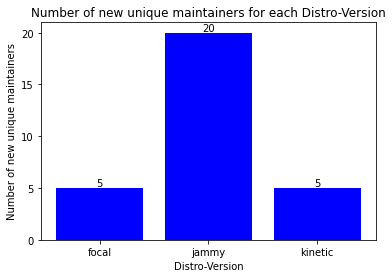

In [10]:
# Added Maintainers

new_focal = 0;
new_jammy = 0;
new_kinetic = 0;

for maintainer in df_focal['Maintainer'].unique():
    if maintainer not in df_bionic['Maintainer'].unique():
        new_focal += 1

for maintainer in df_jammy['Maintainer'].unique():
    if maintainer not in df_focal['Maintainer'].unique():
        new_jammy += 1

for maintainer in df_kinetic['Maintainer'].unique():
    if maintainer not in df_jammy['Maintainer'].unique():
        new_kinetic += 1

# Plt bar chart
plt.bar(['focal', 'jammy', 'kinetic'], [new_focal, new_jammy, new_kinetic], color='blue')
plt.title('Number of new unique maintainers for each Distro-Version')
plt.xlabel('Distro-Version')
plt.ylabel('Number of new unique maintainers')
plt.yticks(np.arange(0, 22, 5))
# Add numbers on top of the bars
for index, value in enumerate([new_focal, new_jammy, new_kinetic]):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()


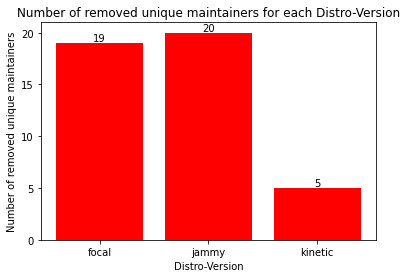

In [11]:
# Removed Maintainers

removed_focal = 0;
removed_jammy = 0;
removed_kinetic = 0;

for maintainer in df_bionic['Maintainer'].unique():
    if maintainer not in df_focal['Maintainer'].unique():
        removed_focal += 1

for maintainer in df_focal['Maintainer'].unique():
    if maintainer not in df_jammy['Maintainer'].unique():
        removed_jammy += 1

for maintainer in df_jammy['Maintainer'].unique():
    if maintainer not in df_kinetic['Maintainer'].unique():
        removed_kinetic += 1

# Plt bar chart
plt.bar(['focal', 'jammy', 'kinetic'], [removed_focal, removed_jammy, removed_kinetic], color='red')
plt.title('Number of removed unique maintainers for each Distro-Version')
plt.xlabel('Distro-Version')
plt.ylabel('Number of removed unique maintainers')
plt.yticks(np.arange(0, 22, 5))
# Add numbers on top of the bars
for index, value in enumerate([removed_focal, removed_jammy, removed_kinetic]):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

# Now lets plot the % of change in Maintainers for each Distro-Version

Number of packages for bionic:  80637
Number of packages for focal:  78480
Number of packages for jammy:  71556
Number of packages for kinetic:  69055
Number of packages that have changed maintainer for focal:  54424
Number of packages that have changed maintainer for jammy:  57505
Number of packages that have changed maintainer for kinetic:  64937


C:\Users\ISA\AppData\Local\Temp\ipykernel_8948\1681406808.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_focal['HasChangedMaintainer'] = np.where(df_focal['Package'].isin(df_bionic['Package']) & (~df_focal['Maintainer'].equals(df_bionic.set_index('Package')['Maintainer'])), 1, 0)
C:\Users\ISA\AppData\Local\Temp\ipykernel_8948\1681406808.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jammy['HasChangedMaintainer'] = np.where(df_jammy['Package'].isin(df_focal['Package']) & (~df_jammy['Maintai

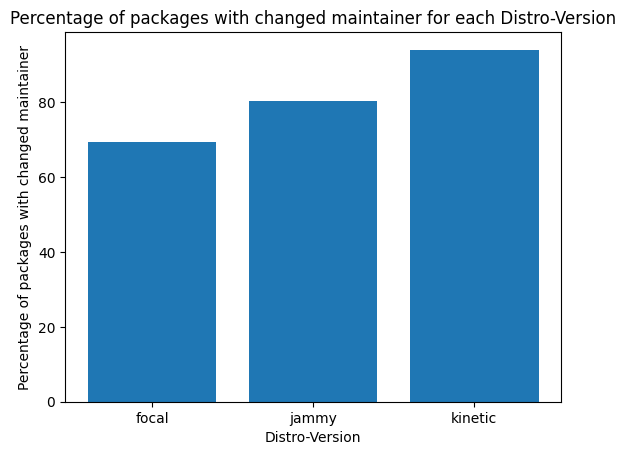

In [55]:
# Divide dataframes by Distro-Version
df_bionic = df[df['Distro-Version'] == '18.04 - bionic']
df_focal = df[df['Distro-Version'] == '20.04 - focal']
df_jammy = df[df['Distro-Version'] == '22.04 - jammy']
df_kinetic = df[df['Distro-Version'] == '22.10 - kinetic']


# Print number of packages for each Distro-Version
print('Number of packages for bionic: ', df_bionic['Package'].nunique())
print('Number of packages for focal: ', df_focal['Package'].nunique())
print('Number of packages for jammy: ', df_jammy['Package'].nunique())
print('Number of packages for kinetic: ', df_kinetic['Package'].nunique())
print('=============================================')

# Starting with focal, for each package, in a column named HasChangedMaintainer, if the package with the same name in the previous Distro-Version has a different Maintainer, then the value is 1, otherwise 0
df_focal['HasChangedMaintainer'] = np.where(df_focal['Package'].isin(df_bionic['Package']) & (~df_focal['Maintainer'].equals(df_bionic.set_index('Package')['Maintainer'])), 1, 0)
df_jammy['HasChangedMaintainer'] = np.where(df_jammy['Package'].isin(df_focal['Package']) & (~df_jammy['Maintainer'].equals(df_focal.set_index('Package')['Maintainer'])), 1, 0)
df_kinetic['HasChangedMaintainer'] = np.where(df_kinetic['Package'].isin(df_jammy['Package']) & (~df_kinetic['Maintainer'].equals(df_jammy.set_index('Package')['Maintainer'])), 1, 0)


# Count the number of packages that have changed maintainer for each Distro-Version
print('Number of packages that have changed maintainer for focal: ', df_focal['HasChangedMaintainer'].sum())
print('Number of packages that have changed maintainer for jammy: ', df_jammy['HasChangedMaintainer'].sum())
print('Number of packages that have changed maintainer for kinetic: ', df_kinetic['HasChangedMaintainer'].sum())

# Calculate the % of packages that have changed maintainer for each Distro-Version
per_focal = df_focal['HasChangedMaintainer'].sum() / df_focal['Package'].nunique() * 100
per_jammy = df_jammy['HasChangedMaintainer'].sum() / df_jammy['Package'].nunique() * 100
per_kinetic = df_kinetic['HasChangedMaintainer'].sum() / df_kinetic['Package'].nunique() * 100

# Create a bar chart
plt.bar(['focal', 'jammy', 'kinetic'], [per_focal, per_jammy, per_kinetic])
plt.xlabel('Distro-Version')
plt.ylabel('Percentage of packages with changed maintainer')
plt.title('Percentage of packages with changed maintainer for each Distro-Version')
plt.show()
